# Testing methods

In [1]:
from gradient_descent import gradient_descent
from conjugate_gradients import conjugate_gradients_method
from one_dimensional import dichotomy_method, fibonacci_method, golden_ratio_method
from newton import newton

import numpy as np
from math import exp

def first_function(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x) ** 2 + (1 - x) ** 2

def first_function_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-200 * (y - x) + 2 * x - 2, 200 * (y - x)])

def first_function_hess(args):
    x = args[0]
    y = args[1]
    return np.array([[202, -200], [-200, 200]])

def second_function(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

def second_function_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-400 * (y - x ** 2) * x - 2 * (1 - x), 200 * (y - x ** 2)])

def second_function_hess(args):
    x = args[0]
    y = args[1]
    return np.array([[-400 * ((y - x ** 2) - 2 * x ** 2) + 2, -400 * x], [-400 * x, 200]])

def third_function(args):
    x = args[0]
    y = args[1]
    return (-1) * (2 * exp(-((x - 1) / 2) ** 2 - (y - 1) ** 2) + 3 * exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2))

def third_function_grad(args):
    x = args[0]
    y = args[1]
    return (-1.0) * np.array([2 * exp(-((x - 1) / 2) ** 2 - (y - 1) ** 2) * (-(x - 1) / 2) +
            3 * exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2) * (2.0 / 3.0) * (-(x - 2) / 3),
            2 * exp(-((x - 1) / 2) ** 2 - (y - 1) ** 2) * (-2 * (y - 1)) +
            3 * exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2) * (-((y - 3) / 2))])

def third_function_hess(args):
    x = args[0]
    y = args[1]
    return (-1) * np.array(
        [[3 * ((4 / 81) * (x - 2) ** 2 * exp((-1 / 9) * (x - 2) ** 2 - (1 / 4) * (y - 3) ** 2) -
            (2 / 9) * exp((-1 / 9) * (x - 2) ** 2 - (1 / 4) * (y - 3) ** 2)) +
        2 * ((1 / 4) * (x - 1) ** 2 * exp((-(1 / 4) * (1 - x) ** 2 - (y - 1) ** 2)) -
            (1 / 2) * exp(-(1 / 4) * (1 - x) ** 2 - (y - 1) ** 2)),
        (1 / 3) * (x - 2) * (y - 3) * exp(-(1 / 9) * (x - 2) ** 2 - (1 / 4) * (y - 3) ** 2) +
        2 * (x - 1) * (y - 1) * exp(-(1 / 4) * (x - 1) ** 2 - (y - 1) ** 2)],
        [(1 / 3) * (x - 2) * (y - 3) * exp(-(1 / 9) * (x - 2) ** 2 - (1 / 4) * (y - 3) ** 2) +
        2 * (x - 1) * (y - 1) * exp(-(1 / 4) * (x - 1) ** 2 - (y - 1) ** 2),
        3 * ((1 / 4) * (y - 3) ** 2 * exp((-1 / 9) * (x - 2) ** 2 - (1 / 4) * (3 - y) ** 2) -
            (1 / 2) * exp((-1 / 9) * (x - 2) ** 2 - (1 / 4) * (3 - y) ** 2)) +
        2 * (4 * (y - 1) ** 2 * exp((-1 / 4) * (x - 1) ** 2 - (y - 1) ** 2) -
            2 * exp((-1 / 4) * (x - 1) ** 2 - (y - 1) ** 2))]]
    )

functions = [
    (first_function, first_function_grad, first_function_hess, [1, 1]),
    (second_function, second_function_grad, second_function_hess, [1, 1]),
    (third_function, third_function_grad, third_function_hess, [1.96715, 2.88611])
]

In [2]:
import matplotlib.pyplot as plt

def bar_chart(data, labels):
    def bar(X, i, color):
        axes.bar(X + 0.25, [x[i] for x in data], color=color, width=0.25)

    figure = plt.figure()
    axes = figure.add_axes([0, 0, 1, 1])

    size = len(data[0])
    X = np.arange(len(data))
    colors = ['r', 'g', 'b']

    for i in range(size):
        bar(X + i / size, i, colors[i % len(colors)])

    axes.legend(labels=labels)
    axes.set_xticks(X + 0.58)
    axes.set_xticklabels([f'function #{i}' for i in range(len(data))])

    plt.show()

## convergance speed (iterations)

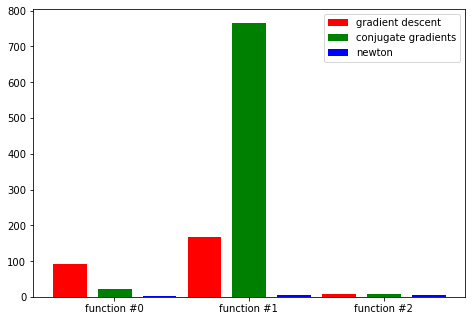

In [3]:
traces = [
    [
        gradient_descent(f, grad, np.array([3, 2]), golden_ratio_method),
        conjugate_gradients_method(f, grad, np.array([3, 2]), golden_ratio_method, criterion=3, eps=1e-6),
        newton(f, grad, hess, np.array([3, 2]), 1)
    ]
    for f, grad, hess, _ in functions
]

sizes = [[len(trace) for trace in methods] for methods in traces]

bar_chart(sizes, ['gradient descent', 'conjugate gradients', 'newton'])

## reliability (answer distance)

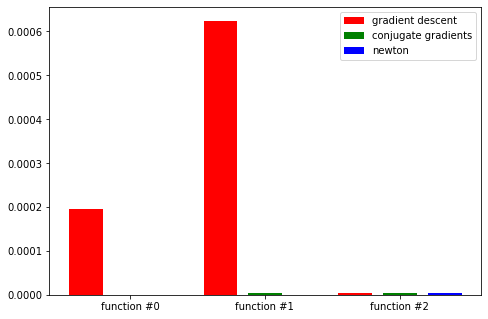

In [4]:
traces = [
    (
        [
            gradient_descent(f, grad, np.array([3, 2]), golden_ratio_method),
            conjugate_gradients_method(f, grad, np.array([3, 2]), golden_ratio_method, criterion=3, eps=1e-6),
            newton(f, grad, hess, np.array([3, 2]), 1)
        ],
        answer
    )
    for f, grad, hess, answer in functions
]

distances = [[np.linalg.norm(trace[-1] - np.array(answer)) for trace in methods] for methods, answer in traces]

bar_chart(distances, ['gradient descent', 'conjugate gradients', 'newton'])

## RAM

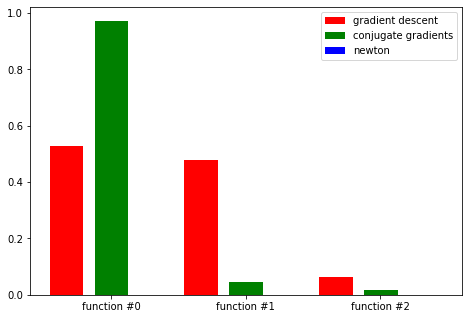

In [5]:
traces = [
    [
        gradient_descent(f, grad, np.array([3, 2]), golden_ratio_method, ram_instead=True),
        conjugate_gradients_method(f, grad, np.array([3, 2]), golden_ratio_method, criterion=3, eps=1e-6, ram_instead=True),
        newton(f, grad, hess, np.array([3, 2]), 1, ram_instead=True)
    ]
    for f, grad, hess, _ in functions
]

sizes = [[max(method) - method[0] for method in methods] for methods in traces]

bar_chart(sizes, ['gradient descent', 'conjugate gradients', 'newton'])

## arithmetic operations number

In [6]:
# TODO

## time

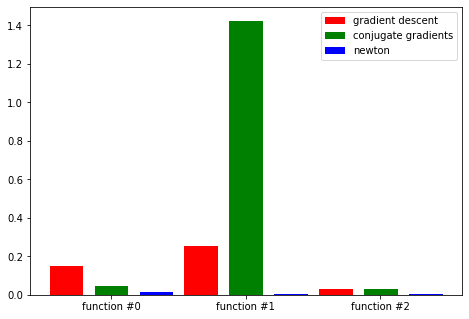

In [7]:
from timeit import default_timer as timer

def stopwatch(f):
    start = timer()
    f()
    return timer() - start

time = [
    [
        stopwatch(lambda: gradient_descent(f, grad, np.array([3, 2]), golden_ratio_method)),
        stopwatch(lambda: conjugate_gradients_method(f, grad, np.array([3, 2]), golden_ratio_method, criterion=3, eps=1e-6)),
        stopwatch(lambda: newton(f, grad, hess, np.array([3, 2]), 1))
    ]
    for f, grad, hess, _ in functions
]

bar_chart(time, ['gradient descent', 'conjugate gradients', 'newton'])